## Milliman Project

### Import Necessary Libaries

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
import zipfile
from scipy import stats
from scipy.stats import linregress
import os
from pandas import Timestamp
import functools as ft
from collections import defaultdict

In [2]:
# Set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print('The notebook is set up to display multiple output in one cell.')

The notebook is set up to display multiple output in one cell.


In [3]:
# Set the warnings to be ignored 
import warnings 
warnings.filterwarnings('ignore') 

### Read in Data Sets

#### ED Visit Rates

In [4]:
ED_visits = pd.read_csv('Emergency Department Visits.csv')

# Change fips column to type string and add 0s in front
ED_visits['fips'] = ED_visits['fips'].apply(str).str.zfill(5)

ED_visits.head()

,population,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01001,Autauga County,ALABAMA,Urban,All,All,undefined,588
1,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01003,Baldwin County,ALABAMA,Rural,All,All,undefined,608
2,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01005,Barbour County,ALABAMA,Rural,All,All,undefined,747
3,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01007,Bibb County,ALABAMA,Urban,All,All,undefined,593
4,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01009,Blount County,ALABAMA,Urban,All,All,undefined,601


In [5]:
ED_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3218 entries, 0 to 3217
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   population           3218 non-null   object
 1   year                 3218 non-null   int64 
 2   geography            3218 non-null   object
 3   measure              3218 non-null   object
 4   adjustment           3218 non-null   object
 5   analysis             3218 non-null   object
 6   domain               3218 non-null   object
 7   condition            3218 non-null   object
 8   primary_sex          3218 non-null   object
 9   primary_age          3218 non-null   object
 10  primary_dual         3218 non-null   object
 11  fips                 3218 non-null   object
 12  county               3205 non-null   object
 13  state                3218 non-null   object
 14  urban                3218 non-null   object
 15  primary_race         3218 non-null   object
 16  primar

#### County Health Rankings

In [6]:
county_health = pd.read_excel('2022 County Health Rankings.xlsx', header=[0, 1], sheet_name = 'Ranked Measure Data')
county_health.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Premature death  \
                FIPS              State             County      Unreliable   
0               1000            Alabama                NaN             NaN   
1               1001            Alabama            Autauga             NaN   
2               1003            Alabama            Baldwin             NaN   
3               1005            Alabama            Barbour             NaN   
4               1007            Alabama               Bibb             NaN   

                                                                          \
    Deaths Years of Potential Life Lost Rate  95% CI - Low 95% CI - High   
0  88086.0                      10350.071456  10246.133257  10454.009654   
1    836.0                       8027.394727   7197.625811   8857.163642   
2   3377.0                       8118.358206   7666.874101   8569.842311   
3    539.0                      12876.760319  11149.914146  14603.606492   
4    460.0                      11191.474323   9625.525237  12757.423408   

                             ...                 Driving alone to work  \
  Quartile YPLL Rate (AIAN)  ... % Drive Alone (Hispanic) 95% CI - Low   
0      NaN      5967.152772  ...                             75.535160   
1      1.0              NaN  ...                                   NaN   
2      1.0              NaN  ...                             55.867256   
3      4.0              NaN  ...                                   NaN   
4      2.0              NaN  ...                                   NaN   

                                                                \
  % Drive Alone (Hispanic) 95% CI - High % Drive Alone (white)   
0                              78.799663             86.055641   
1                                    NaN             83.296611   
2                              80.357512             81.540985   
3                                    NaN             86.687233   
4                                    NaN                   NaN   

                                                                          \
  % Drive Alone (white) 95% CI - Low % Drive Alone (white) 95% CI - High   
0                          85.719519                           86.391762   
1                          77.733686                           88.859537   
2                          80.170701                           82.911268   
3                          83.222177                           90.152289   
4                                NaN                                 NaN   

  Long commute - driving alone                                             \
     # Workers who Drive Alone % Long Commute - Drives Alone 95% CI - Low   
0                      2095195                          35.2    34.723404   
1                        24949                          40.5    36.433197   
2                        97098                          37.9    35.225113   
3                         8555                          36.8    31.207610   
4                         8107                          55.3    47.108998   

                          
  95% CI - High Quartile  
0     35.676596      NaN  
1     44.566803      3.0  
2     40.574887      2.0  
3     42.392390      2.0  
4     63.491002      4.0  

[5 rows x 249 columns]

In [7]:
# The next two cells cleans up the two header issue from the county health rankings dataset.
geography = ['Unnamed: 0_level_0','Unnamed: 1_level_0','Unnamed: 2_level_0']
sections = ['Primary care physicians','Dentists','Mental health providers']

county_health_2 = county_health.iloc[:, county_health.columns.isin(geography+sections, level=0)]
county_health_2.columns = [col[1] if col[0].startswith('Unnamed:') else ': '.join(col) for col in county_health_2.columns.values]
county_health_2['FIPS'] = county_health_2['FIPS'].apply(str).str.zfill(5)
county_health_2.head()

,FIPS,State,County,Primary care physicians: # Primary Care Physicians,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: # Dentists,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: # Mental Health Providers,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile
0,01000,Alabama,NaN,3228.0,65.83476,1519:1,NaN,2429.0,49.35455,2026:1,NaN,5818.0,118.21522,846:1,NaN
1,01001,Alabama,Autauga,25.0,44.74753,2235:1,2.0,19.0,33.84095,2955:1,2.0,21.0,37.40315,2674:1,3.0
2,01003,Alabama,Baldwin,154.0,68.98591,1450:1,1.0,112.0,48.84708,2047:1,1.0,228.0,99.43869,1006:1,2.0
3,01005,Alabama,Barbour,9.0,36.45791,2743:1,3.0,9.0,36.60173,2732:1,2.0,6.0,24.40115,4098:1,3.0
4,01007,Alabama,Bibb,13.0,58.05126,1723:1,1.0,6.0,27.10517,3689:1,3.0,6.0,27.10517,3689:1,3.0


In [8]:
county_health_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   FIPS                                                    3193 non-null   object 
 1   State                                                   3193 non-null   object 
 2   County                                                  3142 non-null   object 
 3   Primary care physicians: # Primary Care Physicians      3038 non-null   float64
 4   Primary care physicians: Primary Care Physicians Rate   3040 non-null   float64
 5   Primary care physicians: Primary Care Physicians Ratio  3040 non-null   object 
 6   Primary care physicians: Quartile                       3082 non-null   float64
 7   Dentists: # Dentists                                    3103 non-null   float64
 8   Dentists: Dentist Rate                

In [9]:
# Merge data sets 
merged = ED_visits.merge(county_health_2, left_on='fips', right_on='FIPS', how = 'left')
pd.set_option('display.max_columns', None)
merged.head(5)

,population,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value,FIPS,State,County,Primary care physicians: # Primary Care Physicians,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: # Dentists,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: # Mental Health Providers,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile
0,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01001,Autauga County,ALABAMA,Urban,All,All,undefined,588,01001,Alabama,Autauga,25.0,44.74753,2235:1,2.0,19.0,33.84095,2955:1,2.0,21.0,37.40315,2674:1,3.0
1,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01003,Baldwin County,ALABAMA,Rural,All,All,undefined,608,01003,Alabama,Baldwin,154.0,68.98591,1450:1,1.0,112.0,48.84708,2047:1,1.0,228.0,99.43869,1006:1,2.0
2,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01005,Barbour County,ALABAMA,Rural,All,All,undefined,747,01005,Alabama,Barbour,9.0,36.45791,2743:1,3.0,9.0,36.60173,2732:1,2.0,6.0,24.40115,4098:1,3.0
3,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01007,Bibb County,ALABAMA,Urban,All,All,undefined,593,01007,Alabama,Bibb,13.0,58.05126,1723:1,1.0,6.0,27.10517,3689:1,3.0,6.0,27.10517,3689:1,3.0
4,Medicare Fee For Service,2022,County,Emergency department visit rate,Unsmoothed actual,Base measure,Primary chronic conditions,All Emergency Department Visits,All,All,Dual & non-dual,01009,Blount County,ALABAMA,Urban,All,All,undefined,601,01009,Alabama,Blount,13.0,22.48124,4448:1,4.0,11.0,19.00517,5262:1,4.0,10.0,17.27742,5788:1,4.0


In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3217
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   population                                              3218 non-null   object 
 1   year                                                    3218 non-null   int64  
 2   geography                                               3218 non-null   object 
 3   measure                                                 3218 non-null   object 
 4   adjustment                                              3218 non-null   object 
 5   analysis                                                3218 non-null   object 
 6   domain                                                  3218 non-null   object 
 7   condition                                               3218 non-null   object 
 8   primary_sex                           

#### Removing Duplicate and Unnecessary Columns

In [11]:
merged.drop(columns = ['FIPS', 'State', 'County', 'population', 'year', 'geography', 'adjustment', 'analysis', 'domain', 'condition', 'primary_sex', 'primary_age', 'primary_dual', 'primary_race', 'primary_eligibility', 'primary_denominator'], inplace = True)
merged.head()

,measure,fips,county,state,urban,analysis_value,Primary care physicians: # Primary Care Physicians,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: # Dentists,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: # Mental Health Providers,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile
0,Emergency department visit rate,01001,Autauga County,ALABAMA,Urban,588,25.0,44.74753,2235:1,2.0,19.0,33.84095,2955:1,2.0,21.0,37.40315,2674:1,3.0
1,Emergency department visit rate,01003,Baldwin County,ALABAMA,Rural,608,154.0,68.98591,1450:1,1.0,112.0,48.84708,2047:1,1.0,228.0,99.43869,1006:1,2.0
2,Emergency department visit rate,01005,Barbour County,ALABAMA,Rural,747,9.0,36.45791,2743:1,3.0,9.0,36.60173,2732:1,2.0,6.0,24.40115,4098:1,3.0
3,Emergency department visit rate,01007,Bibb County,ALABAMA,Urban,593,13.0,58.05126,1723:1,1.0,6.0,27.10517,3689:1,3.0,6.0,27.10517,3689:1,3.0
4,Emergency department visit rate,01009,Blount County,ALABAMA,Urban,601,13.0,22.48124,4448:1,4.0,11.0,19.00517,5262:1,4.0,10.0,17.27742,5788:1,4.0


#### Removing Raw Counts of Medical Professionals

In [12]:
merged.drop(columns = ['Primary care physicians: # Primary Care Physicians', 'Dentists: # Dentists', 'Mental health providers: # Mental Health Providers'], inplace = True)
merged.head()

,measure,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile
0,Emergency department visit rate,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235:1,2.0,33.84095,2955:1,2.0,37.40315,2674:1,3.0
1,Emergency department visit rate,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450:1,1.0,48.84708,2047:1,1.0,99.43869,1006:1,2.0
2,Emergency department visit rate,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743:1,3.0,36.60173,2732:1,2.0,24.40115,4098:1,3.0
3,Emergency department visit rate,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723:1,1.0,27.10517,3689:1,3.0,27.10517,3689:1,3.0
4,Emergency department visit rate,01009,Blount County,ALABAMA,Urban,601,22.48124,4448:1,4.0,19.00517,5262:1,4.0,17.27742,5788:1,4.0


#### Change Data Type of Ratios

In [13]:
merged['Primary care physicians: Primary Care Physicians Ratio'].dtype

dtype('O')

In [14]:
for i in merged.columns:
    if 'ratio' in i.lower():
        merged[i] = merged[i].str[:-2].astype(float)
    
merged

,measure,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile
0,Emergency department visit rate,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,2.0,33.84095,2955.0,2.0,37.40315,2674.0,3.0
1,Emergency department visit rate,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,1.0,48.84708,2047.0,1.0,99.43869,1006.0,2.0
2,Emergency department visit rate,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,3.0,36.60173,2732.0,2.0,24.40115,4098.0,3.0
3,Emergency department visit rate,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,1.0,27.10517,3689.0,3.0,27.10517,3689.0,3.0
4,Emergency department visit rate,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,4.0,19.00517,5262.0,4.0,17.27742,5788.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213,Emergency department visit rate,72145,Vega Baja Municipio,PUERTO RICO,Urban,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3214,Emergency department visit rate,72147,Vieques Municipio,PUERTO RICO,Rural,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3215,Emergency department visit rate,72149,Villalba Municipio,PUERTO RICO,Urban,392,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,Emergency department visit rate,72151,Yabucoa Municipio,PUERTO RICO,Urban,460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


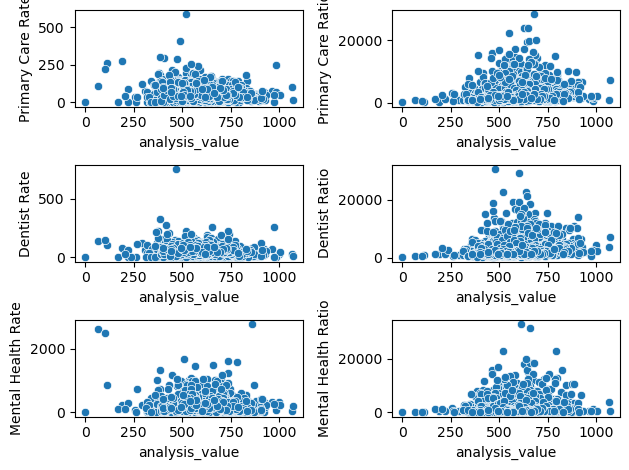

In [15]:
fig, axes = plt.subplots(3, 2)


sns.scatterplot(data = merged, x = 'analysis_value', y = 'Primary care physicians: Primary Care Physicians Rate', ax = axes[0, 0])
axes[0,0].set(ylabel = 'Primary Care Rate')
sns.scatterplot(data = merged, x = 'analysis_value', y = 'Primary care physicians: Primary Care Physicians Ratio', ax = axes[0, 1])
axes[0,1].set(ylabel = 'Primary Care Ratio')

sns.scatterplot(data = merged, x = 'analysis_value', y = 'Dentists: Dentist Rate', ax = axes[1, 0])
axes[1,0].set(ylabel = 'Dentist Rate')
sns.scatterplot(data = merged, x = 'analysis_value', y = 'Dentists: Dentist Ratio', ax = axes[1, 1])
axes[1,1].set(ylabel = 'Dentist Ratio')

sns.scatterplot(data = merged, x = 'analysis_value', y = 'Mental health providers: Mental Health Provider Rate', ax = axes[2, 0])
axes[2,0].set(ylabel = 'Mental Health Rate')
sns.scatterplot(data = merged, x = 'analysis_value', y = 'Mental health providers: Mental Health Provider Ratio', ax = axes[2, 1])
axes[2,1].set(ylabel = 'Mental Health Ratio')

fig.tight_layout();

#### Analysis of Distributions
All seem to provide a pretty normal distribution, not revealing much information or significant correlation.

### Read in Healthcare Shortage Data Sets

#### Dental Health

In [16]:
dental = pd.read_csv('Health Professional Shortage Areas/BCD_HPSA_FCT_DET_DH.csv')
dental.head()

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 64
0,LI - Port Angeles/Townsend Service Area,6535862475,HPSA Population,Dental Health,12,WA,Designated,08/06/2021,08/06/2021,Unknown,53009002300,Not applicable,NaN,3.9279,28293.0,12.8,7203:1,Low Income Population HPSA,Rural,NaN,NaN,NaN,N,"Clallam County, WA",NaN,Region 10,WA,53009,53,Washington,Clallam,009,6,NaN,NaN,"Census Tract 23, Clallam County, Washington",NaN,WA,CT,Census Tract,Low Income Population HPSA,15712.0,12581.0,0,LI,NaN,4000:1,NaN,3.1421,D,Hpsa Pop,NaN,53,Washington,Not Applicable,R,WA,53009,53,Washington,N,N,02/21/2024,2024/02/21,NaN
1,Kitsap County,6535808941,Geographic HPSA,Dental Health,12,WA,Designated,10/16/2017,09/10/2021,Unknown,53035,Not applicable,NaN,39.8700,257272.0,8.7,6453:1,Geographic Population,Non-Rural,NaN,NaN,NaN,N,"Kitsap County, WA",NaN,Region 10,WA,53035,53,Washington,Kitsap,035,6,NaN,NaN,Kitsap,NaN,WA,SCTY,Single County,Geographic Population,199350.0,57922.0,0,TRC,NaN,5000:1,NaN,11.5800,D,Hpsa Geo,NaN,53,Washington,Not Applicable,N,WA,53035,53,Washington,N,N,02/21/2024,2024/02/21,NaN
2,Port Gamble S'Klallam Tribe - Wellness Clinic,6535783360,"Indian Health Service, Tribal Health, and Urba...",Dental Health,19,WA,Withdrawn,02/11/2020,09/18/2020,Unknown,POINT,NaN,09/18/2020,NaN,8277.0,NaN,NaN,NaN,Non-Rural,-122.569949,47.851843,NaN,N,"Kitsap County, WA",98346.0,Region 10,WA,53035,53,Washington,Kitsap,035,6,31912 Little Boston Rd NE,Kingston,Port Gamble S'Klallam Tribe - Wellness Clinic,6535783360,NaN,UNK,Unknown,"Indian Health Service, Tribal Health, and Urba...",NaN,NaN,0,NaN,98346-9700,NaN,NaN,NaN,W,ITU,2020/09/18,53,Washington,NaN,N,WA,53035,53,Washington,N,N,02/21/2024,2024/02/21,NaN
3,RITZVILLE MEDICAL CLINIC,6535736483,Rural Health Clinic,Dental Health,11,WA,Designated,12/28/2021,12/28/2021,Unknown,POINT,NaN,NaN,NaN,25029.0,NaN,NaN,NaN,Rural,-118.372213,47.120972,NaN,N,"Adams County, WA",99169.0,Region 10,WA,53001,53,Washington,Adams,001,6,903 S Adams St,Ritzville,RITZVILLE MEDICAL CLINIC,6535736483,NaN,UNK,Unknown,Rural Health Clinic,NaN,NaN,0,NaN,99169-2227,NaN,NaN,NaN,D,RHC,NaN,53,Washington,NaN,R,WA,53001,53,Washington,N,N,02/21/2024,2024/02/21,NaN
4,Seattle Indian Health Board - Lake City Clinic,6535470984,"Indian Health Service, Tribal Health, and Urba...",Dental Health,10,WA,Designated,10/05/2023,10/05/2023,Unknown,POINT,NaN,NaN,NaN,27498.0,NaN,NaN,NaN,Non-Rural,-122.292119,47.722342,NaN,N,"King County, WA",98125.0,R

In [17]:
dental.columns

Index(['HPSA Name', 'HPSA ID', 'Designation Type', 'HPSA Discipline Class',
       'HPSA Score', 'Primary State Abbreviation', 'HPSA Status',
       'HPSA Designation Date', 'HPSA Designation Last Update Date',
       'Metropolitan Indicator', 'HPSA Geography Identification Number',
       'HPSA Degree of Shortage', 'Withdrawn Date', 'HPSA FTE',
       'HPSA Designation Population', '% of Population Below 100% Poverty',
       'HPSA Formal Ratio', 'HPSA Population Type', 'Rural Status',
       'Longitude', 'Latitude', 'BHCMIS Organization Identification Number',
       'Break in Designation', 'Common County Name', 'Common Postal Code',
       'Common Region Name', 'Common State Abbreviation',
       'Common State County FIPS Code', 'Common State FIPS Code',
       'Common State Name', 'County Equivalent Name',
       'County or County Equivalent Federal Information Processing Standard Code',
       'Discipline Class Number', 'HPSA Address', 'HPSA City',
       'HPSA Component Name', 'H

In [18]:
dental = dental[['HPSA Score', '% of Population Below 100% Poverty', 'Common State County FIPS Code', 'HPSA Estimated Served Population', 'HPSA Estimated Underserved Population']]

grouped = dental.groupby('Common State County FIPS Code').agg('mean')

mapping = {}
for column in grouped.columns:
    mapping[column] = "Dental Health: " + column
grouped.rename(mapper = mapping, axis = 'columns', inplace = True)
grouped.head()

,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Served Population,Dental Health: HPSA Estimated Underserved Population
Common State County FIPS Code,,,,
01001,17.00,16.90,9556.0,65590.0
01003,8.50,17.90,49960.0,182060.0
01005,16.25,24.40,3260.0,11858.5
01007,15.80,18.15,12598.5,32300.5
01009,15.50,15.45,3586.5,17867.0


In [19]:
merged = merged.merge(grouped, left_on='fips', right_on = 'Common State County FIPS Code', how = 'left')
pd.set_option('display.max_columns', None)
merged.head(5)

,measure,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Served Population,Dental Health: HPSA Estimated Underserved Population
0,Emergency department visit rate,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,2.0,33.84095,2955.0,2.0,37.40315,2674.0,3.0,17.00,16.90,9556.0,65590.0
1,Emergency department visit rate,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,1.0,48.84708,2047.0,1.0,99.43869,1006.0,2.0,8.50,17.90,49960.0,182060.0
2,Emergency department visit rate,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,3.0,36.60173,2732.0,2.0,24.40115,4098.0,3.0,16.25,24.40,3260.0,11858.5
3,Emergency department visit rate,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,1.0,27.10517,3689.0,3.0,27.10517,3689.0,3.0,15.80,18.15,12598.5,32300.5
4,Emergency department visit rate,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,4.0,19.00517,5262.0,4.0,17.27742,5788.0,4.0,15.50,15.45,3586.5,17867.0


In [20]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3217
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   measure                                                 3218 non-null   object 
 1   fips                                                    3218 non-null   object 
 2   county                                                  3205 non-null   object 
 3   state                                                   3218 non-null   object 
 4   urban                                                   3218 non-null   object 
 5   analysis_value                                          3218 non-null   int64  
 6   Primary care physicians: Primary Care Physicians Rate   2978 non-null   float64
 7   Primary care physicians: Primary Care Physicians Ratio  2978 non-null   float64
 8   Primary care physicians: Quartile     

#### Mental Health

In [21]:
mental = pd.read_csv('Health Professional Shortage Areas/BCD_HPSA_FCT_DET_MH.csv')
mental.head()

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 64
0,ARBOR HEALTH MOSSYROCK CLINIC,7538901840,Rural Health Clinic,Mental Health,13,WA,Designated,09/30/2021,09/30/2021,Unknown,POINT,NaN,NaN,NaN,33640.0,NaN,NaN,NaN,Rural,-122.485358,46.533849,NaN,N,"Lewis County, WA",98564.0,Region 10,WA,53041,53,Washington,Lewis,041,7,745 Williams St,Mossyrock,ARBOR HEALTH MOSSYROCK CLINIC,7538901840,NaN,UNK,Unknown,Rural Health Clinic,NaN,NaN,0,NaN,98564-9004,NaN,NaN,NaN,D,RHC,NaN,53,Washington,NaN,R,WA,53041,53,Washington,N,N,02/21/2024,2024/02/21,NaN
1,The Native Project,7538868217,"Indian Health Service, Tribal Health, and Urba...",Mental Health,20,WA,Designated,08/18/2019,09/11/2021,Unknown,POINT,NaN,NaN,NaN,19731.0,NaN,NaN,NaN,Non-Rural,-117.438664,47.670612,NaN,N,"Spokane County, WA",99201.0,Region 10,WA,53063,53,Washington,Spokane,063,7,1803 W Maxwell Ave,Spokane,The Native Project,7538868217,NaN,UNK,Unknown,"Indian Health Service, Tribal Health, and Urba...",NaN,NaN,0,NaN,99201-2831,NaN,NaN,NaN,D,ITU,NaN,53,Washington,NaN,N,WA,53063,53,Washington,N,N,02/21/2024,2024/02/21,NaN
2,GHCH HOQUIAM CLINIC,7538829087,Rural Health Clinic,Mental Health,16,WA,Designated,12/16/2022,12/16/2022,Unknown,POINT,NaN,NaN,NaN,28518.0,NaN,NaN,NaN,Rural,-123.884678,46.975098,NaN,N,"Grays Harbor County, WA",98550.0,Region 10,WA,53027,53,Washington,Grays Harbor,027,7,815 K St,Hoquiam,GHCH HOQUIAM CLINIC,7538829087,NaN,UNK,Unknown,Rural Health Clinic,NaN,NaN,0,NaN,98550-3705,NaN,NaN,NaN,D,RHC,NaN,53,Washington,NaN,R,WA,53027,53,Washington,N,N,02/21/2024,2024/02/21,NaN
3,SWOFFORD & HALMA CLINIC INC PS,7538825096,Rural Health Clinic,Mental Health,17,WA,Designated,08/18/2019,09/12/2021,Unknown,POINT,NaN,NaN,NaN,137174.0,NaN,NaN,NaN,Rural,-119.982938,46.325397,NaN,N,"Yakima County, WA",98944.0,Region 10,WA,53077,53,Washington,Yakima,077,7,2303 Reith Way,Sunnyside,SWOFFORD & HALMA CLINIC INC PS,7538825096,NaN,UNK,Unknown,Rural Health Clinic,NaN,NaN,0,NaN,98944-9521,NaN,NaN,NaN,D,RHC,NaN,53,Washington,NaN,R,WA,53077,53,Washington,N,N,02/21/2024,2024/02/21,NaN
4,Washington Corrections Center,7538768831,Correctional Facility,Mental Health,15,WA,Designated,02/05/2019,12/10/2021,Unknown,POINT,6,NaN,1.5,9076.0,NaN,NaN,NaN,Rural,-123.189669,47.241119,NaN,N,"Mason County, WA",98584.0,Region 10,WA,53045,53,Washington,Mason,045,7,2321 W Dayton Airport Rd,Shelton,Washington Corrections Center,7538768831,NaN,UNK,Unknown,Correctional Facility,NaN,NaN,0,NaN,98584-6

In [22]:
mental = mental[['HPSA Score', 'Common State County FIPS Code', 'HPSA Estimated Served Population', 'HPSA Estimated Underserved Population']]

grouped2 = mental.groupby('Common State County FIPS Code').agg('mean')

mapping = {}
for column in grouped2.columns:
    mapping[column] = "Mental Health: " + column
grouped2.rename(mapper = mapping, axis = 'columns', inplace = True);

In [23]:
merged = merged.merge(grouped2, left_on = 'fips', right_on = 'Common State County FIPS Code', how = 'left')
merged.head(5)

,measure,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Served Population,Dental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Score,Mental Health: HPSA Estimated Served Population,Mental Health: HPSA Estimated Underserved Population
0,Emergency department visit rate,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,2.0,33.84095,2955.0,2.0,37.40315,2674.0,3.0,17.00,16.90,9556.0,65590.0,13.00,181525.000000,68234.000000
1,Emergency department visit rate,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,1.0,48.84708,2047.0,1.0,99.43869,1006.0,2.0,8.50,17.90,49960.0,182060.0,13.25,15288.636364,26996.545455
2,Emergency department visit rate,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,3.0,36.60173,2732.0,2.0,24.40115,4098.0,3.0,16.25,24.40,3260.0,11858.5,14.20,112400.000000,41980.000000
3,Emergency department visit rate,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,1.0,27.10517,3689.0,3.0,27.10517,3689.0,3.0,15.80,18.15,12598.5,32300.5,16.80,3975.000000,86303.500000
4,Emergency department visit rate,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,4.0,19.00517,5262.0,4.0,17.27742,5788.0,4.0,15.50,15.45,3586.5,17867.0,18.50,48520.000000,234168.500000


In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3217
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   measure                                                 3218 non-null   object 
 1   fips                                                    3218 non-null   object 
 2   county                                                  3205 non-null   object 
 3   state                                                   3218 non-null   object 
 4   urban                                                   3218 non-null   object 
 5   analysis_value                                          3218 non-null   int64  
 6   Primary care physicians: Primary Care Physicians Rate   2978 non-null   float64
 7   Primary care physicians: Primary Care Physicians Ratio  2978 non-null   float64
 8   Primary care physicians: Quartile     

#### Primary Care

In [25]:
primary = pd.read_csv('Health Professional Shortage Areas/BCD_HPSA_FCT_DET_PC.csv')
primary.head()

,HPSA Name,HPSA ID,Designation Type,HPSA Discipline Class,HPSA Score,PC MCTA Score,Primary State Abbreviation,HPSA Status,HPSA Designation Date,HPSA Designation Last Update Date,Metropolitan Indicator,HPSA Geography Identification Number,HPSA Degree of Shortage,Withdrawn Date,HPSA FTE,HPSA Designation Population,% of Population Below 100% Poverty,HPSA Formal Ratio,HPSA Population Type,Rural Status,Longitude,Latitude,BHCMIS Organization Identification Number,Break in Designation,Common County Name,Common Postal Code,Common Region Name,Common State Abbreviation,Common State County FIPS Code,Common State FIPS Code,Common State Name,County Equivalent Name,County or County Equivalent Federal Information Processing Standard Code,Discipline Class Number,HPSA Address,HPSA City,HPSA Component Name,HPSA Component Source Identification Number,HPSA Component State Abbreviation,HPSA Component Type Code,HPSA Component Type Description,HPSA Designation Population Type Description,HPSA Estimated Served Population,HPSA Estimated Underserved Population,HPSA Metropolitan Indicator Code,HPSA Population Type Code,HPSA Postal Code,HPSA Provider Ratio Goal,HPSA Resident Civilian Population,HPSA Shortage,HPSA Status Code,HPSA Type Code,HPSA Withdrawn Date String,Primary State FIPS Code,Primary State Name,Provider Type,Rural Status Code,State Abbreviation,State and County Federal Information Processing Standard Code,State FIPS Code,State Name,U.S. - Mexico Border 100 Kilometer Indicator,U.S. - Mexico Border County Indicator,Data Warehouse Record Create Date,Data Warehouse Record Create Date Text,Unnamed: 65
0,ME - Bushwick,1369659769,HPSA Population,Primary Care,18,8.0,NY,Designated,09/30/2022,09/30/2022,Unknown,36047040700,Not applicable,NaN,7.3428,87167.0,23.6,11871:1,Medicaid Eligible Population HPSA,Non-Rural,NaN,NaN,NaN,N,"Kings County, NY",NaN,Region 2,NY,36047,36,New York,Kings,047,1,NaN,NaN,"Census Tract 407, Kings County, New York",NaN,NY,CT,Census Tract,Medicaid Eligible Population HPSA,22028.0,65139.0,0,M,NaN,3000:1,NaN,21.7172,D,Hpsa Pop,NaN,36,New York,Not Applicable,N,NY,36047,36,New York,N,N,02/21/2024,2024/02/21,NaN
1,ME - Bushwick,1369659769,HPSA Population,Primary Care,18,8.0,NY,Designated,09/30/2022,09/30/2022,Unknown,36047048900,Not applicable,NaN,7.3428,87167.0,23.6,11871:1,Medicaid Eligible Population HPSA,Non-Rural,NaN,NaN,NaN,N,"Kings County, NY",NaN,Region 2,NY,36047,36,New York,Kings,047,1,NaN,NaN,"Census Tract 489, Kings County, New York",NaN,NY,CT,Census Tract,Medicaid Eligible Population HPSA,22028.0,65139.0,0,M,NaN,3000:1,NaN,21.7172,D,Hpsa Pop,NaN,36,New York,Not Applicable,N,NY,36047,36,New York,N,N,02/21/2024,2024/02/21,NaN
2,ME - Bushwick,1369659769,HPSA Population,Primary Care,18,8.0,NY,Designated,09/30/2022,09/30/2022,Unknown,36047049100,Not applicable,NaN,7.3428,87167.0,23.6,11871:1,Medicaid Eligible Population HPSA,Non-Rural,NaN,NaN,NaN,N,"Kings County, NY",NaN,Region 2,NY,36047,36,New York,Kings,047,1,NaN,NaN,"Census Tract 491, Kings County, New York",NaN,NY,CT,Census Tract,Medicaid Eligible Population HPSA,22028.0,65139.0,0,M,NaN,3000:1,NaN,21.7172,D,Hpsa Pop,NaN,36,New York,Not Applicable,N,NY,36047,36,New York,N,N,02/21/2024,2024/02/21,NaN
3,ME - Bushwick,1369659769,HPSA Population,Primary Care,18,8.0,NY,Designated,09/30/2022,09/30/2022,Unknown,36047040100,Not applicable,NaN,7.3428,87167.0,23.6,11871:1,Medicaid Eligible Population HPSA,Non-Rural,NaN,NaN,NaN,N,"Kings County, NY",NaN,Region 2,NY,36047,36,New York,Kings,047,1,NaN,NaN,"Census Tract 401, Kings County, New York",NaN,NY,CT,Census Tract,Medicaid Eligible Population HPSA,22028.0,65139.0,0,M,NaN,3000:1,NaN,21.7172,D,Hpsa Pop,NaN,36,New York,Not Applicable,N,NY,36047,36,New York,N,N,02/21/2024,2024/02/21,NaN
4,ME - Bushwick,1369659769,HPSA Population,Primary Care,18,8.0,NY,Designated,09/30/2022,09/30/2022,Unknown,36081055300,Not applicable,NaN,7.3428,87167.0,23.6,11871:1,Medicaid Eligible Population HPSA,Non-Rural,NaN,NaN,NaN,N,"Queens County, NY",NaN,Re

In [26]:
primary = primary[['HPSA Score', 'Common State County FIPS Code', 'HPSA Estimated Served Population', 'HPSA Estimated Underserved Population']]

grouped3 = primary.groupby('Common State County FIPS Code').agg('mean')

mapping = {}
for column in grouped3.columns:
    mapping[column] = "Primary Care: " + column
grouped3.rename(mapper = mapping, axis = 'columns', inplace = True);

In [27]:
merged = merged.merge(grouped3, left_on = 'fips', right_on = 'Common State County FIPS Code', how = 'left')
merged.head(5)

,measure,fips,county,state,urban,analysis_value,Primary care physicians: Primary Care Physicians Rate,Primary care physicians: Primary Care Physicians Ratio,Primary care physicians: Quartile,Dentists: Dentist Rate,Dentists: Dentist Ratio,Dentists: Quartile,Mental health providers: Mental Health Provider Rate,Mental health providers: Mental Health Provider Ratio,Mental health providers: Quartile,Dental Health: HPSA Score,Dental Health: % of Population Below 100% Poverty,Dental Health: HPSA Estimated Served Population,Dental Health: HPSA Estimated Underserved Population,Mental Health: HPSA Score,Mental Health: HPSA Estimated Served Population,Mental Health: HPSA Estimated Underserved Population,Primary Care: HPSA Score,Primary Care: HPSA Estimated Served Population,Primary Care: HPSA Estimated Underserved Population
0,Emergency department visit rate,01001,Autauga County,ALABAMA,Urban,588,44.74753,2235.0,2.0,33.84095,2955.0,2.0,37.40315,2674.0,3.0,17.00,16.90,9556.0,65590.0,13.00,181525.000000,68234.000000,13.000000,40162.333333,42831.866667
1,Emergency department visit rate,01003,Baldwin County,ALABAMA,Rural,608,68.98591,1450.0,1.0,48.84708,2047.0,1.0,99.43869,1006.0,2.0,8.50,17.90,49960.0,182060.0,13.25,15288.636364,26996.545455,13.666667,19090.192308,16227.230769
2,Emergency department visit rate,01005,Barbour County,ALABAMA,Rural,747,36.45791,2743.0,3.0,36.60173,2732.0,2.0,24.40115,4098.0,3.0,16.25,24.40,3260.0,11858.5,14.20,112400.000000,41980.000000,10.888889,10305.833333,-139.000000
3,Emergency department visit rate,01007,Bibb County,ALABAMA,Urban,593,58.05126,1723.0,1.0,27.10517,3689.0,3.0,27.10517,3689.0,3.0,15.80,18.15,12598.5,32300.5,16.80,3975.000000,86303.500000,16.750000,18025.000000,2607.000000
4,Emergency department visit rate,01009,Blount County,ALABAMA,Urban,601,22.48124,4448.0,4.0,19.00517,5262.0,4.0,17.27742,5788.0,4.0,15.50,15.45,3586.5,17867.0,18.50,48520.000000,234168.500000,7.000000,52938.000000,4170.000000


In [28]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3218 entries, 0 to 3217
Data columns (total 25 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   measure                                                 3218 non-null   object 
 1   fips                                                    3218 non-null   object 
 2   county                                                  3205 non-null   object 
 3   state                                                   3218 non-null   object 
 4   urban                                                   3218 non-null   object 
 5   analysis_value                                          3218 non-null   int64  
 6   Primary care physicians: Primary Care Physicians Rate   2978 non-null   float64
 7   Primary care physicians: Primary Care Physicians Ratio  2978 non-null   float64
 8   Primary care physicians: Quartile     

### Read in Area Health Resources Data Sets

#### Healthcare Facilities

In [29]:
facilities = pd.read_csv('Area Health Resources/ahrf2023HF.csv')
facilities.head()

,fips_st_cnty,cnty_name_st_abbrev,hosp_21,hosp_20,stgh_21,stgh_20,stngh_21,stngh_20,lth_21,lth_20,sth_psych_21,sth_psych_20,sth_rehab_21,sth_rehab_20,sth_child_med_21,sth_child_med_20,sth_child_psych_21,sth_child_psych_20,stlt_acute_cares_21,stlt_acute_cares_20,ltgh_med_surg_hosp_21,ltgh_med_surg_hosp_20,lth_psych_21,lth_psych_20,lth_rehab_21,lth_rehab_20,lth_chronc_dis_21,lth_chronc_dis_20,lth_intel_disblts_21,lth_intel_disblts_20,lth_child_psych_21,lth_child_psych_20,lth_acute_long_care_hosp_21,lth_acute_long_care_hosp_20,sth_comn_21,sth_comn_20,vetn_hosp_21,vetn_hosp_20,critcl_access_hosp_21,critcl_access_hosp_20,stgh_critcl_access_21,stgh_critcl_access_20,rural_refrrl_ctr_21,rural_refrrl_ctr_20,sole_comn_provdrs_21,sole_comn_provdrs_20,stgh_jcaho_accred_21,stgh_jcaho_accred_20,stnglth_jcaho_accred_21,stnglth_jcaho_accred_20,stgh_dnv_accred_21,stgh_dnv_accred_20,stnglth_dnv_accred_21,stnglth_dnv_accred_20,stgh_acs_cancr_pgm_approvd_21,stgh_acs_cancr_pgm_approvd_20,stnglth_acs_cancr_pgm_approvd_21,stnglth_acs_cancr_pgm_approvd_20,stgh_resdncy_tranng_21,stgh_resdncy_tranng_20,stnglth_resdncy_tranng_21,stnglth_resdncy_tranng_20,stgh_med_sch_affil_21,stgh_med_sch_affil_20,stnglth_med_sch_affil_21,stnglth_med_sch_affil_20,vetn_hosp_med_sch_affil_21,vetn_hosp_med_sch_affil_20,stgh_carf_accred_21,stgh_carf_accred_20,stnglth_carf_accred_21,stnglth_carf_accred_20,stgh_membr_coth_21,stgh_membr_coth_20,vetn_hosp_membr_coth_21,vetn_hosp_membr_coth_20,sth_comn_membr_coth_21,sth_comn_membr_coth_20,stnglth_membr_coth_21,stnglth_membr_coth_20,stgh_aoa_accred_21,stgh_aoa_accred_20,stnglth_aoa_accred_21,stnglth_aoa_accred_20,stgh_medcr_cert_21,stgh_medcr_cert_20,stnglth_medcr_cert_21,stnglth_medcr_cert_20,hosp_adm_21,hosp_adm_20,stgh_hosp_adm_21,stgh_hosp_adm_20,stnglth_hosp_adm_21,stnglth_hosp_adm_20,sth_comn_hosp_adm_21,sth_comn_hosp_adm_20,vetn_hosp_hosp_adm_21,vetn_hosp_hosp_adm_20,hosp_nh_adm_21,hosp_nh_adm_20,stgh_nh_adm_21,stgh_nh_adm_20,stnglth_nh_adm_21,stnglth_nh_adm_20,medcr_ffs_acute_readm_21,medcr_ffs_acute_readm_20,medcr_ffs_hosp_readm_rate_21,medcr_ffs_hosp_readm_rate_20,medcr_ffs_prev_hosp_rate_20,medcr_ffs_prev_hosp_rate_19,hosp_beds_21,hosp_beds_20,stgh_hosp_beds_21,stgh_hosp_beds_20,stngh_hosp_beds_21,stngh_hosp_beds_20,lth_hosp_beds_21,lth_hosp_beds_20,sth_comn_hosp_beds_21,sth_comn_hosp_beds_20,vetn_hosp_hosp_beds_21,vetn_hosp_hosp_beds_20,hosp_nh_beds_21,hosp_nh_beds_20,stgh_nh_beds_21,stgh_nh_beds_20,stngh_nh_beds_21,stngh_nh_beds_20,lth_nh_beds_21,lth_nh_beds_20,hosp_licd_beds_21,hosp_licd_beds_20,stgh_licd_hosp_beds_21,stgh_licd_hosp_beds_20,stngh_licd_hosp_beds_21,stngh_licd_hosp_beds_20,lth_licd_hosp_beds_21,lth_licd_hosp_beds_20,hosp_licd_nh_beds_21,hosp_licd_nh_beds_20,stgh_licd_nh_beds_21,stgh_licd_nh_beds_20,stngh_licd_nh_beds_21,stngh_licd_nh_beds_20,lth_licd_nh_beds_21,lth_licd_nh_beds_20,stgh_bassnts_21,stgh_bassnts_20,stnglth_bassnts_21,stnglth_bassnts_20,stgh_006_049_beds_21,stgh_006_049_beds_20,stgh_050_099_beds_21,stgh_050_099_beds_20,stgh_100_199_beds_21,stgh_100_199_beds_20,stgh_200_299_beds_21,stgh_200_299_beds_20,stgh_ge300_beds_21,stgh_ge300_beds_20,stnglth_006_049_beds_21,stnglth_006_049_beds_20,stnglth_050_099_beds_21,stnglth_050_099_beds_20,stnglth_100_199_beds_21,stnglth_100_199_beds_20,stnglth_200_299_beds_21,stnglth_200_299_beds_20,stnglth_ge300_beds_21,stnglth_ge300_beds_20,vetn_hosp_006_049_beds_21,vetn_hosp_006_049_beds_20,vetn_hosp_050_099_beds_21,vetn_hosp_050_099_beds_20,vetn_hosp_100_199_beds_21,vetn_hosp_100_199_beds_20,vetn_hosp_200_299_beds_21,vetn_hosp_200_299_beds_20,vetn_hosp_ge300_beds_21,vetn_hosp_ge300_beds_20,stgh_gen_med_surg_care_adult_21,stgh_gen_med_surg_care_ped_21,stgh_obstetrc_care_21,stgh_med_surg_icu_21,stgh_card_icu_21,stgh_neonat_icu_21,stgh_neonat_interm_care_21,stgh_ped_icu_21,stgh_burn_care_21,stgh_oth_specl_care_21,stgh_oth_icu_21,stgh_rehab_care_21,stgh_substnc_use_inpat_care_21,stgh_psych_care_21,stgh_skilld_nursng_care_21,stgh_interm_care_21,stgh_acute_long_t

In [30]:
facilities = facilities[[
    'fips_st_cnty',
    'snf_22',                         
    'snf_beds_22',
    'snf_cert_beds_22',                
    'nurs_fac_22',                     
    'nurs_fac_beds_22',                
    'nurs_fac_cert_beds_22',           
    'home_hlth_agencs_22',             
    'rural_hlth_clincs_22',            
    'ambultry_surg_ctr_22',            
    'hospcs_22',                      
    'comn_mentl_hlth_ctr_22',         
    'nhsc_activ_sites_22']]
facilities

,fips_st_cnty,snf_22,snf_beds_22,snf_cert_beds_22,nurs_fac_22,nurs_fac_beds_22,nurs_fac_cert_beds_22,home_hlth_agencs_22,rural_hlth_clincs_22,ambultry_surg_ctr_22,hospcs_22,comn_mentl_hlth_ctr_22,nhsc_activ_sites_22
0,1001,1.0,162.0,162.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1003,7.0,772.0,772.0,0.0,0.0,0.0,6.0,0.0,1.0,2.0,2.0,6.0
2,1005,1.0,180.0,180.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0
3,1007,1.0,131.0,131.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7.0
4,1009,2.0,223.0,223.0,0.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,72151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3227,72153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3228,78010,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,9.0
3229,78020,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0


#### Healthcare Professionals

In [31]:
professionals = pd.read_csv('Area Health Resources/ahrf2023HP.csv')
professionals.head()

fips_st_cnty cnty_name_st_abbrev  phys_nf_prim_care_pc_exc_rsdt_21  \
0          1001         Autauga, AL                              26.0   
1          1003         Baldwin, AL                             150.0   
2          1005         Barbour, AL                              10.0   
3          1007            Bibb, AL                              15.0   
4          1009          Blount, AL                              12.0   

   phys_nf_prim_care_pc_exc_rsdt_20  phys_nf_prim_care_pc_rsdnt_21  \
0                              25.0                            1.0   
1                             150.0                           21.0   
2                               8.0                            0.0   
3                              14.0                           13.0   
4                              12.0                            1.0   

   phys_nf_prim_care_pc_rsdnt_20  md_nf_prim_care_pc_excl_rsdnt_21  \
0                            3.0                              24.0   
1                            4.0                             136.0   
2                            1.0                               7.0   
3                            8.0                              14.0   
4                            1.0                              12.0   

   md_nf_prim_care_pc_excl_rsdnt_20  md_nf_prim_care_pc_rsdnt_21  \
0                              24.0                          1.0   
1                             135.0                         18.0   
2                               5.0                          0.0   
3                              12.0                         12.0   
4                              12.0                          1.0   

   md_nf_prim_care_pc_rsdnt_20  do_nf_prim_care_pc_excl_rsdnt_21  \
0                          3.0                               2.0   
1                          4.0                              14.0   
2                          1.0                               3.0   
3                          7.0                               1.0   
4                          1.0                               0.0   

   do_nf_prim_care_pc_excl_rsdnt_20  do_nf_prim_care_pc_rsdnt_21  \
0                               1.0                          0.0   
1                              15.0                          3.0   
2                               3.0                          0.0   
3                               2.0                          1.0   
4                               0.0                          0.0   

   do_nf_prim_care_pc_rsdnt_20  md_nf_fed_activ_21  md_nf_fed_activ_20  \
0                          0.0                43.0                47.0   
1                          0.0               479.0               453.0   
2                          0.0                11.0                11.0   
3                          1.0                27.0                21.0   
4                          0.0                18.0                19.0   

   md_nf_activ_21  md_nf_activ_20  md_nf_fed_21  md_nf_fed_20  md_nf_21  \
0            41.0            45.0          51.0          53.0      49.0   
1           468.0           442.0         598.0         573.0     585.0   
2            11.0            11.0          11.0          12.0      11.0   
3            27.0            21.0          27.0          21.0      27.0   
4            18.0            19.0          20.0          21.0      20.0   

   md_nf_20  md_nf_all_pc_21  md_nf_all_pc_20  md_nf_pc_ofc_21  \
0      51.0             40.0             44.0             35.0   
1     560.0            449.0            425.0            362.0   
2      12.0             10.0             10.0              9.0   
3      21.0             26.0             19.0             14.0   
4      21.0             18.0             19.0             16.0   

   md_nf_pc_ofc_20  md_nf_pc_hosp_all_21  md_nf_pc_hosp_all_20  \
0             35.0                   5.0                   9.0   
1            355.0                  87.0                  70.0   
2   

In [32]:
professionals = professionals[[
    'fips_st_cnty',
    'pa_npi_22',
    'aprn_npi_22',
    'np_npi_22',
    'clin_nurse_spec_npi_22',
    'crna_npi_22',
    'apn_midwvs_npi_22',
    'chiro_npi_22',
    'opto_npi_22',
    'podtrst_npi_22']]
professionals

,fips_st_cnty,pa_npi_22,aprn_npi_22,np_npi_22,clin_nurse_spec_npi_22,crna_npi_22,apn_midwvs_npi_22,chiro_npi_22,opto_npi_22,podtrst_npi_22
0,1001,5.0,34.0,28.0,1.0,5.0,0.0,7.0,5.0,3.0
1,1003,41.0,229.0,195.0,3.0,30.0,1.0,70.0,32.0,8.0
2,1005,1.0,17.0,17.0,0.0,0.0,0.0,1.0,3.0,0.0
3,1007,5.0,32.0,31.0,0.0,1.0,0.0,3.0,1.0,0.0
4,1009,0.0,22.0,20.0,0.0,2.0,0.0,2.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3226,72151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3227,72153,0.0,2.0,1.0,0.0,1.0,0.0,4.0,7.0,0.0
3228,78010,15.0,26.0,17.0,0.0,3.0,6.0,10.0,6.0,2.0
3229,78020,1.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
